In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# my quad tree histogram code, from here: https://github.com/jradavenport/qthist2d
import sys
sys.path.append('/Users/james/Dropbox/python/qthist2d/')
from qthist2d import qthist, qtcount, binned_statistic_qt

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

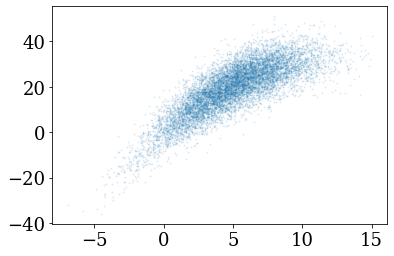

In [3]:
# some random 2d data
x = np.random.normal(loc=5, scale=3, size=10000)
y = np.random.normal(loc=1, scale=6, size=10000) - (0.2* x**2) + (5*x)

# add some 2d velocities
vx = (0.1*x) + np.random.normal(loc=0, scale=(0.1), size=10000)
vy = (0.1*y) + np.random.normal(loc=0, scale=(0.1), size=10000) + (0.3 *(x-8)) + (0.1 * vx)

plt.scatter(x,y, s=1, alpha=0.1)

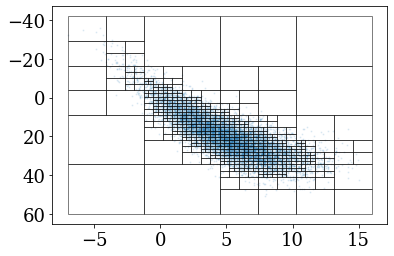

In [4]:
# compute the quad tree histogram binning
num, xmin, xmax, ymin, ymax = qthist(x,y, N=6, thresh=20, density=True, 
                                     rng=[[-7,16],[-42,60]])

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x,y, s=1, alpha=0.1, rasterized=True)

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc ='none', lw=1, alpha=0.5, color='k'))
plt.gca().invert_yaxis()

In [7]:
x0 = (xmin + xmax)/2
y0 = (ymin + ymax)/2

dx = binned_statistic_qt(x,y,vx, statistic='median', edges=(xmin,xmax,ymin,ymax))
dy = binned_statistic_qt(x,y,vy, statistic='median', edges=(xmin,xmax,ymin,ymax))

(60.0, -42.0)

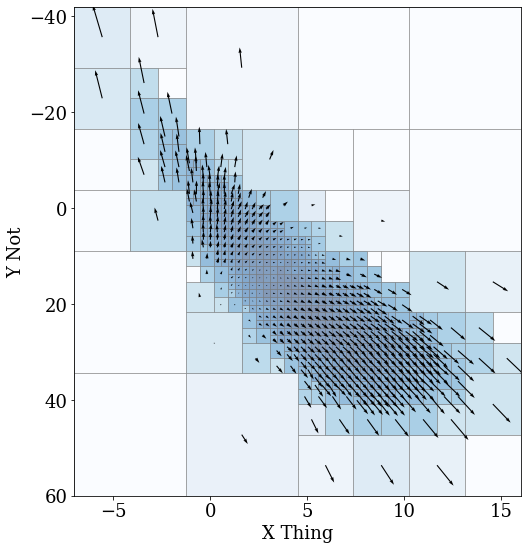

In [8]:
CMAP = plt.cm.Blues

fig = plt.figure(figsize=(8,9))
ax = fig.add_subplot(111)

CLR = num + np.min(num[num > 0])
CLR = np.log10(CLR)
CLR = (CLR - np.nanmin(CLR)) / (np.nanmax(CLR - np.nanmin(CLR)))

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               ec='grey', lw=1, alpha=0.5, color=CMAP(CLR[k])))

Enorm = np.sqrt(dx**2 + dy**2)
plt.quiver(x0, y0, dx, dy, units='xy', angles='xy')

plt.xlabel('X Thing')
plt.ylabel('Y Not')
# plt.gca().invert_yaxis()
plt.xlim(xmin.min(), xmax.max())
plt.ylim(ymax.max(), ymin.min())

In [9]:
def mystat(x):
    return -100

In [10]:
test_mean = binned_statistic_qt(x, y, np.sqrt(vx**2 + vy**2), statistic=mystat, 
                                edges=(xmin,xmax,ymin,ymax))
test_mean

array([-100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100.,